In [13]:
import matplotlib.pyplot as plt
import os
import csv
import pandas as pd
import numpy as np
from collections import defaultdict

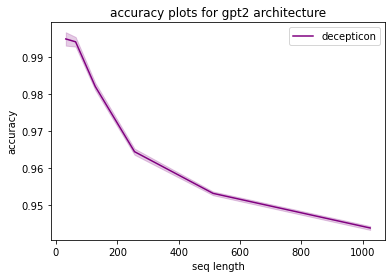

In [26]:
def get_stats(path='~/breaching/tables', method='decepticon', model='trafo3', seq_len=32, bs=1, metric='accuracy', gelu=False):
    def get_path():
        if not gelu:
            partial_path = os.path.join(path, f'{method}_{model}_{seq_len}_{bs}')
        else:
            partial_path = os.path.join(path, f'{method}_{model}_gelu_{seq_len}_{bs}')
            
        for subdir in reversed(sorted(os.listdir(partial_path))):
            for folder in os.listdir(os.path.join(partial_path, subdir)):
                for run in os.listdir(os.path.join(partial_path, subdir, folder)):
                    if run == 'tables':
                        if len(os.listdir(os.path.join(partial_path, subdir, folder, run))) == 0:
                            continue
                        for tab in os.listdir(os.path.join(partial_path, subdir, folder, run)):
                            return os.path.join(partial_path, subdir, folder, run, tab)

    path_to_table = get_path()
    path_to_table = r'{}'.format(path_to_table)
    data = pd.read_csv(path_to_table, sep='\t')
    return data[metric].mean(), data[metric].std()/np.sqrt(len(data[metric]))

def produce_plot( methods: list[str], seq_len: list[int], bs: list[int], model: str, metric='accuracy', path='~/breaching/tables', gelu=False):
    results = defaultdict(list)
    errors = defaultdict(list)
    for method in methods:
        for l in seq_len:
            for sz in bs:
                mean, std = get_stats(path, method, model, l, sz, metric, gelu)
                results[method].append(mean)
                errors[method].append(std)
    
    _, name, axis = sorted([(len(seq_len), 'seq length', seq_len), (len(bs), 'batch size', bs)])[-1]           
    
    x = np.linspace(0, 30, 30)
    y = np.sin(x/6*np.pi)
    error = np.random.normal(0.1, 0.02, size=y.shape)
    y += np.random.normal(0, 0.1, size=y.shape)

    colors = ['purple','r', 'b', 'y', 'orange']
    colors = iter(colors)
    for method in methods:
        c = next(colors)
        plt.plot(axis, results[method], c, label=method)
        plt.fill_between(axis, [r - e for (r,e) in zip(results[method], errors[method])], 
                         [r + e for (r,e) in zip(results[method], errors[method])], alpha=0.2, color=c)
    
    plt.legend()
    plt.ylabel(metric)
    plt.xlabel(name)
    plt.title(f'{metric} plots for {model} architecture')
    plt.show()
    
produce_plot(methods=['decepticon'], seq_len=[32, 64, 128, 256, 512, 1024], bs=[1], model='gpt2', metric='accuracy', path=r'C:\Users\lhfow\Desktop\breaching')
                    